# <center>Network Science</center>

## <center> #1: Power law</center>

### <center>Student: *Sobitkhon Atakhujaev*</center>

#### <hr /> General Information

## Problems

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

1.9.1
1.4.3
alpha= 1.71941763006
sigma= 0.0090508895608
sigma^2= 8.19186018419e-05
std^2= 15360778764.5
count       6318.000000
mean       13566.670782
std       123948.418391
min          800.000000
25%         1282.250000
50%         2335.000000
75%         6049.500000
max      6187267.000000
Name: number, dtype: float64
mean= 13566.6707819
median= 2335.0


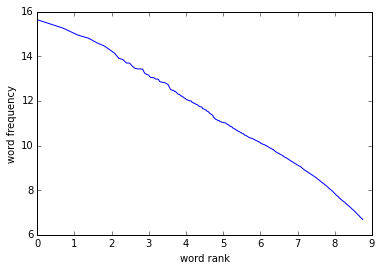

In [73]:
# Start your code here
#
#
#
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
%matplotlib inline
data = pd.read_csv('wordcounts.txt', header = None)


#np.loadtxt("wordcounts.txt",dtype=None,delimiter='', skiprows=0)
print(nx.__version__)
print(matplotlib.__version__)
data1=data[0].str.extract('(?P<number>\d+)\s(?P<word>\w+)')
data1.number = data1.number.astype('int')
data1.head()
plt.plot(np.log(1 + np.arange(data1.shape[0])), np.log(data1.number.values), '-') 
plt.ylabel('word frequency')
plt.xlabel('word rank')
2.
xmin=np.min(data1.number)
alpha1 = 1 + ( len(data1.number) *1.0 / sum(np.log(data1.number/xmin)) )
print 'alpha=',alpha1
sigma = (alpha1 - 1)/np.sqrt(data1.number.shape[0])
print 'sigma=', sigma
print 'sigma^2=', sigma**2

std1 = np.std(data1.number)**2
print 'std^2=', std1
#plt.plot(data1.freq.values, 1+np.arange(data1.shape[0]), '-')
#data1.freq = data1.number / data1.number.sum()
#plt.plot(np.log(1 + np.arange(data1.shape[0])), np.log(data1.number.values), '-')
3. 
              
print data1.number.describe()
              
min_1 = np.min(data1.number)
max_1 = np.max(data1.number)
mean_1 = np.mean(data1.number)
median_1 = np.median(data1.number)
print 'mean=',mean_1
print 'median=' , median_1

**1. **
    Yes Zipf's Law holds

**2 **
 alpha= 1.71941763006
 sigma= 0.0090508895608

**3**<br>
count       6318.000000 <br>
mean       13566.670782 <br>
std       123948.418391 <br>
min          800.000000 <br>
25%         1282.250000 <br>
50%         2335.000000 <br>
75%         6049.500000 <br>
max      6187267.000000 <br>
mean= 13566.6707819 <br>
median= 2335.0 <br>

### <hr /> Task 2.

Find and plot PDF and CDF for the following networks:
* [Routing network](http://www.leonidzhukov.net/hse/2015/networks/data/network.txt)
* [Web graph](http://www.leonidzhukov.net/hse/2015/networks/data/web_Stanford.txt)
* [Facebook network](http://www.leonidzhukov.net/hse/2015/networks/data/fb_Princeton.txt)


1. Are they correspondent to power law?
2. Find max and mean values of incoming and outcoming node degrees
3. Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$
4. Determine $x_{min}$ via Kolmogorov-Smirnov test

In [2]:
# Start your code here
#
#
#
G1 = nx.read_edgelist('network.txt',nodetype=int)
G3 = nx.read_edgelist('fb_Princeton.txt',nodetype=int)
G2 = nx.read_edgelist('web_Stanford.txt',nodetype=int,create_using=nx.DiGraph())

In [3]:
def find_cdf(k, x_min=1):
    myarray=np.asarray(k.values())
    myarray = myarray[myarray >= x_min]
    d=pd.Series(myarray).value_counts().sort_index()
    d=d/d.sum()
    cdf=d.cumsum()
    return cdf

def find_cdfx(k,x_min=1):
    myarray=np.asarray(k.values())
    myarray = myarray[myarray >= x_min]
    alpha = 1 + ( myarray.shape[0] *1.0 / np.sum(np.log(myarray/x_min)) )
    sigma = (alpha - 1)/np.sqrt(myarray.shape[0])
#     print('alpha=', alpha, 'sigma =', sigma, 'x_min=', x_min)
    myarray = np.unique(myarray)
    #print myarray
    cdfx = 1-(myarray/x_min)**(-alpha+1)
    return cdfx

def find_ccdf(d):
    ccdf = 1 - d
    return ccdf

In [67]:
def draw_pdf_cdf_kolmogorov_smirnov_test(k):
    plt.figure(figsize=(20,7))
    degrees = pd.Series(k.values())
    pdf = (degrees.value_counts()/degrees.count()).sort_index()
    plt.title('PDF')
    plt.ylabel('probability')
    plt.xlabel('degree')
    plt.semilogx(pdf,'s--')

    cdf = find_cdf(k, x_min=1)
    ccdf = 1-cdf
    cdfx = find_cdfx(k, x_min=1)
    plt.figure(figsize=(20,5))
    plt.title('CCDF')
    plt.xlabel('DEGREE')
    plt.ylabel('CCDF')
    ccdf.plot(style='*-', loglog=True, figsize=(20,7))#print ccdf

    myarray= np.unique(degrees.values)
    myarray = myarray[myarray >= 1]

    plt.figure(figsize=(20,10))
    plt.title('CDF')
    plt.xlabel('DEGREE')
    plt.ylabel('CDF')
    plt.semilogx(myarray, cdfx, '-', color='red')
    plt.semilogx(myarray, cdf, '*', color='blue', linewidth=3)
    
    
    plt.figure(figsize=(20,10))
    ds = [np.max(np.abs(find_cdf(k, x_min=i) - find_cdfx(k, x_min=i))) for i in myarray]
    plt.xlabel('Xmin')
    plt.ylabel('D')
    plt.title('The result of Kolmogorov-Smirnov test(compare model and experimental CDF)')
    plt.semilogx(myarray, ds)
    minimum = myarray[np.argmin(ds)]
    plt.axvline(myarray[np.argmin(ds)], color='red')
    degrees = degrees[degrees >= minimum]
    alpha = 1 + ( degrees.shape[0] *1.0 / np.sum(np.log(degrees.values/minimum)) )
    sigma = (alpha - 1)/np.sqrt(degrees.shape[0])
    print 'x min = ', minimum, 'alpha =', alpha ,'sigma=',sigma,'sigma^2=', sigma**2, 'in KST(Kolmogorov-Smirnov test)'

# Facebook network

In [32]:
k3=G3.degree()

In [ ]:
draw_pdf_cdf_kolmogorov_smirnov_test(k3)

**From the graph of CDF we can see that our CDF isn't Power law. It will be power law only in tail from Xmin**

# WEB_GRAPH

**WEBGRAPH INCOMING Degree**

In [24]:
k21=G2.in_degree()

In [ ]:
draw_pdf_cdf_kolmogorov_smirnov_test(k21)

**Yes Routing network correspondent to Power Law** It is Power Law with alpha>=2 from Xmin

**Webgraph OUTCOMING DEGREE**

In [13]:
k22=G2.out_degree()

In [ ]:
draw_pdf_cdf_kolmogorov_smirnov_test(k22)

**Yes Routing network correspondent to Power Law**

# Routing network

In [16]:
k1=G1.degree()

In [ ]:
draw_pdf_cdf_kolmogorov_smirnov_test(k1)

**Yes Routing network correspondent to Power Law**